In [1]:
import pandas as pd
import os

# Шлях до папки з файлами
data_folder = "data"
files = ["2015.csv", "2016.csv", "2017.csv", "2018.csv", "2019.csv"]

# Мапінг назв колонок до уніфікованих назв
column_mappings = {
    "Country or region": "Country",
    "Overall rank": "Happiness.Rank",
    "Happiness Rank": "Happiness.Rank",
    "Happiness.Rank": "Happiness.Rank",
    "Score": "Happiness.Score",
    "Happiness Score": "Happiness.Score",
    "Happiness.Score": "Happiness.Score",
    "Dystopia Residual": "Dystopia.Residual",
    "Dystopia.Residual": "Dystopia.Residual",
    "Economy (GDP per Capita)": "GDP.per.Capita",
    "Economy..GDP.per.Capita.": "GDP.per.Capita",
    "GDP per capita": "GDP.per.Capita",
    "Family": "Social.Support",
    "Social support": "Social.Support",
    "Health (Life Expectancy)": "Healthy.Life.Expectancy",
    "Health..Life.Expectancy.": "Healthy.Life.Expectancy",
    "Healthy life expectancy": "Healthy.Life.Expectancy",
    "Freedom to make life choices": "Freedom",
    "Freedom": "Freedom",
    "Trust (Government Corruption)": "Corruption",
    "Trust..Government.Corruption.": "Corruption",
    "Perceptions of corruption": "Corruption",
    "Generosity": "Generosity"
}

# Список для об'єднання DataFrame'ів
dfs = []

# Завантаження та обробка даних
for file in files:
    year = int(file.split(".")[0])  # Отримуємо рік з назви файлу
    file_path = os.path.join(data_folder, file)

    df = pd.read_csv(file_path)

    # Перейменовуємо колонки згідно з мапінгом
    df.rename(columns=column_mappings, inplace=True)

    # Додаємо колонку "Year"
    df["Year"] = year

    # Додаємо DataFrame у список
    dfs.append(df)

# Об'єднуємо всі файли в один DataFrame
df_combined = pd.concat(dfs, ignore_index=True)

# Видаляємо можливі дублікати колонок (якщо такі є)
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

# Виводимо основну інформацію
print(df_combined.info())

# Виводимо перші 5 рядків
print(df_combined.head())
df_combined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Region                     315 non-null    object 
 2   Happiness.Rank             782 non-null    int64  
 3   Happiness.Score            782 non-null    float64
 4   Standard Error             158 non-null    float64
 5   GDP.per.Capita             782 non-null    float64
 6   Social.Support             782 non-null    float64
 7   Healthy.Life.Expectancy    782 non-null    float64
 8   Freedom                    782 non-null    float64
 9   Corruption                 781 non-null    float64
 10  Generosity                 782 non-null    float64
 11  Dystopia.Residual          470 non-null    float64
 12  Year                       782 non-null    int64  
 13  Lower Confidence Interval  157 non-null    float64

Country          Region  Happiness.Rank  \
0                 Switzerland  Western Europe               1   
1                     Iceland  Western Europe               2   
2                     Denmark  Western Europe               3   
3                      Norway  Western Europe               4   
4                      Canada   North America               5   
..                        ...             ...             ...   
777                    Rwanda             NaN             152   
778                  Tanzania             NaN             153   
779               Afghanistan             NaN             154   
780  Central African Republic             NaN             155   
781               South Sudan             NaN             156   

     Happiness.Score  Standard Error  GDP.per.Capita  Social.Support  \
0              7.587         0.03411         1.39651         1.34951   
1              7.561         0.04884         1.30232         1.40223   
2              7.527         0.03328         1.32548         1.36058   
3              7.522         0.03880         1.45900         1.33095   
4              7.427         0.03553         1.32629         1.32261   
..               ...             ...             ...             ...   
777            3.334             NaN         0.35900         0.71100   
778            3.231             NaN         0.47600         0.88500   
779            3.203             NaN         0.35000         0.51700   
780            3.083             NaN         0.02600         0.00000   
781            2.853             NaN         0.30600         0.57500   

     Healthy.Life.Expectancy  Freedom  Corruption  Generosity  \
0                    0.94143  0.66557     0.41978     0.29678   
1                    0.94784  0.62877     0.14145     0.43630   
2                    0.87464  0.64938     0.48357     0.34139   
3                    0.88521  0.66973     0.36503     0.34699   
4                    0.90563  0.63297     0.32957     0.45811   
..                       ...      ...         ...         ...   
777                  0.61400  0.55500     0.41100     0.21700   
778                  0.49900  0.41700     0.14700     0.27600   
779                  0.36100  0.00000     0.02500     0.15800   
780                  0.10500  0.22500     0.03500     0.23500   
781                  0.29500  0.01000     0.09100     0.20200   

     Dystopia.Residual  Year  Lower Confidence Interval  \
0              2.51738  2015                        NaN   
1              2.70201  2015                        NaN   
2              2.49204  2015                        NaN   
3              2.46531  2015                        NaN   
4              2.45176  2015                        NaN   
..                 ...   ...                        ...   
777                NaN  2019                        NaN   
778                NaN  2019                        NaN   
779                NaN  2019                        NaN   
780                NaN  2019                        NaN   
781                NaN  2019                        NaN   

     Upper Confidence Interval  Whisker.high  Whisker.low  
0                          NaN           NaN          NaN  
1                          NaN           NaN          NaN  
2                          NaN           NaN          NaN  
3                          NaN           NaN          NaN  
4                          NaN           NaN          NaN  
..                         ...           ...          ...  
777                        NaN           NaN          NaN  
778                        NaN           NaN          NaN  
779                        NaN           NaN          NaN  
780                        NaN           NaN          NaN  
781                        NaN           NaN          NaN  

[782 rows x 17 columns]

In [2]:
# Видаляємо зайві колонки
df_combined.drop(columns=[
    "Standard Error", "Lower Confidence Interval", "Region",
    "Upper Confidence Interval", "Whisker.high", "Whisker.low", "Dystopia.Residual"
], inplace=True, errors='ignore')

df_combined

Country  Happiness.Rank  Happiness.Score  \
0                 Switzerland               1            7.587   
1                     Iceland               2            7.561   
2                     Denmark               3            7.527   
3                      Norway               4            7.522   
4                      Canada               5            7.427   
..                        ...             ...              ...   
777                    Rwanda             152            3.334   
778                  Tanzania             153            3.231   
779               Afghanistan             154            3.203   
780  Central African Republic             155            3.083   
781               South Sudan             156            2.853   

     GDP.per.Capita  Social.Support  Healthy.Life.Expectancy  Freedom  \
0           1.39651         1.34951                  0.94143  0.66557   
1           1.30232         1.40223                  0.94784  0.62877   
2           1.32548         1.36058                  0.87464  0.64938   
3           1.45900         1.33095                  0.88521  0.66973   
4           1.32629         1.32261                  0.90563  0.63297   
..              ...             ...                      ...      ...   
777         0.35900         0.71100                  0.61400  0.55500   
778         0.47600         0.88500                  0.49900  0.41700   
779         0.35000         0.51700                  0.36100  0.00000   
780         0.02600         0.00000                  0.10500  0.22500   
781         0.30600         0.57500                  0.29500  0.01000   

     Corruption  Generosity  Year  
0       0.41978     0.29678  2015  
1       0.14145     0.43630  2015  
2       0.48357     0.34139  2015  
3       0.36503     0.34699  2015  
4       0.32957     0.45811  2015  
..          ...         ...   ...  
777     0.41100     0.21700  2019  
778     0.14700     0.27600  2019  
779     0.02500     0.15800  2019  
780     0.03500     0.23500  2019  
781     0.09100     0.20200  2019  

[782 rows x 10 columns]

In [3]:
# Визначаємо колонки, де є пропущені значення
missing_data = df_combined.isnull().sum()

# Виводимо лише ті колонки, де є хоча б один NaN
missing_data = missing_data[missing_data > 0]

print("Колонки з пропущеними значеннями:")
print(missing_data)

Колонки з пропущеними значеннями:
Corruption    1
dtype: int64


In [4]:
# Знайдемо рядки, де значення в колонці "Corruption" є NaN
missing_corruption = df_combined[df_combined["Corruption"].isnull()]

# Виводимо країну та рік, де є пропущене значення
print("Пропущене значення у 'Corruption':")
print(missing_corruption[["Country", "Year"]])


Пропущене значення у 'Corruption':
                  Country  Year
489  United Arab Emirates  2018


In [5]:
# Отримуємо назву країни та рік із пропущеним значенням
missing_country = missing_corruption.iloc[0]["Country"]
missing_year = missing_corruption.iloc[0]["Year"]

# Знаходимо середнє значення "Corruption" для цієї країни у 2017 та 2019 роках
corruption_mean = df_combined[
    (df_combined["Country"] == missing_country) &
    (df_combined["Year"].isin([2017, 2019]))
    ]["Corruption"].mean()

# Заповнюємо NaN отриманим середнім значенням
df_combined.loc[
    (df_combined["Country"] == missing_country) &
    (df_combined["Year"] == missing_year),
    "Corruption"
] = corruption_mean

# Перевіряємо, чи немає більше пропусків у "Corruption"
print("\nПропущені значення після заповнення:")
print(df_combined["Corruption"].isnull().sum())


Пропущені значення після заповнення:
0


In [6]:
# Визначаємо числові ознаки
numeric_columns = ['Happiness.Rank', 'Happiness.Score', 'GDP.per.Capita',
                   'Social.Support', 'Healthy.Life.Expectancy', 'Freedom',
                   'Corruption', 'Generosity']
df_combined = df_combined.groupby("Country").mean().reset_index()
df_combined.drop(columns=["Year"], inplace=True)
df_combined

Country  Happiness.Rank  Happiness.Score  GDP.per.Capita  \
0    Afghanistan           149.4          3.51280        0.357113   
1        Albania           106.4          4.71260        0.938633   
2        Algeria            66.2          5.66760        1.012963   
3         Angola           140.0          3.87225        0.798380   
4      Argentina            31.2          6.45940        1.111035   
..           ...             ...              ...             ...   
165    Venezuela            71.8          5.53140        1.052468   
166      Vietnam            90.8          5.15460        0.723416   
167        Yemen           146.4          3.62580        0.489313   
168       Zambia           114.0          4.58440        0.571761   
169     Zimbabwe           134.8          4.00660        0.344051   

     Social.Support  Healthy.Life.Expectancy   Freedom  Corruption  Generosity  
0          0.409753                 0.254707  0.117924    0.058094    0.267730  
1          0.754931                 0.787696  0.371898    0.043201    0.167887  
2          1.074205                 0.665057  0.178437    0.146099    0.069219  
3          0.938368                 0.133902  0.027433    0.071570    0.105269  
4          1.330960                 0.760895  0.481620    0.064308    0.092371  
..              ...                      ...       ...         ...         ...  
165        1.323264                 0.683741  0.213709    0.071444    0.057186  
166        1.138384                 0.722700  0.577207    0.091921    0.195664  
167        0.865448                 0.365440  0.244175    0.067045    0.096929  
168        0.932381                 0.302761  0.462099    0.097337    0.218430  
169        1.007727                 0.274403  0.323257    0.089997    0.169409  

[170 rows x 9 columns]


Результати тесту Шапіро-Уілка:
Happiness.Rank: p=1.7750e-05 → Не є нормальним
Happiness.Score: p=1.8691e-02 → Не є нормальним
GDP.per.Capita: p=3.3666e-04 → Не є нормальним
Social.Support: p=3.4213e-07 → Не є нормальним
Healthy.Life.Expectancy: p=1.9495e-05 → Не є нормальним
Freedom: p=2.7528e-04 → Не є нормальним
Corruption: p=6.8295e-12 → Не є нормальним
Generosity: p=2.1820e-05 → Не є нормальним


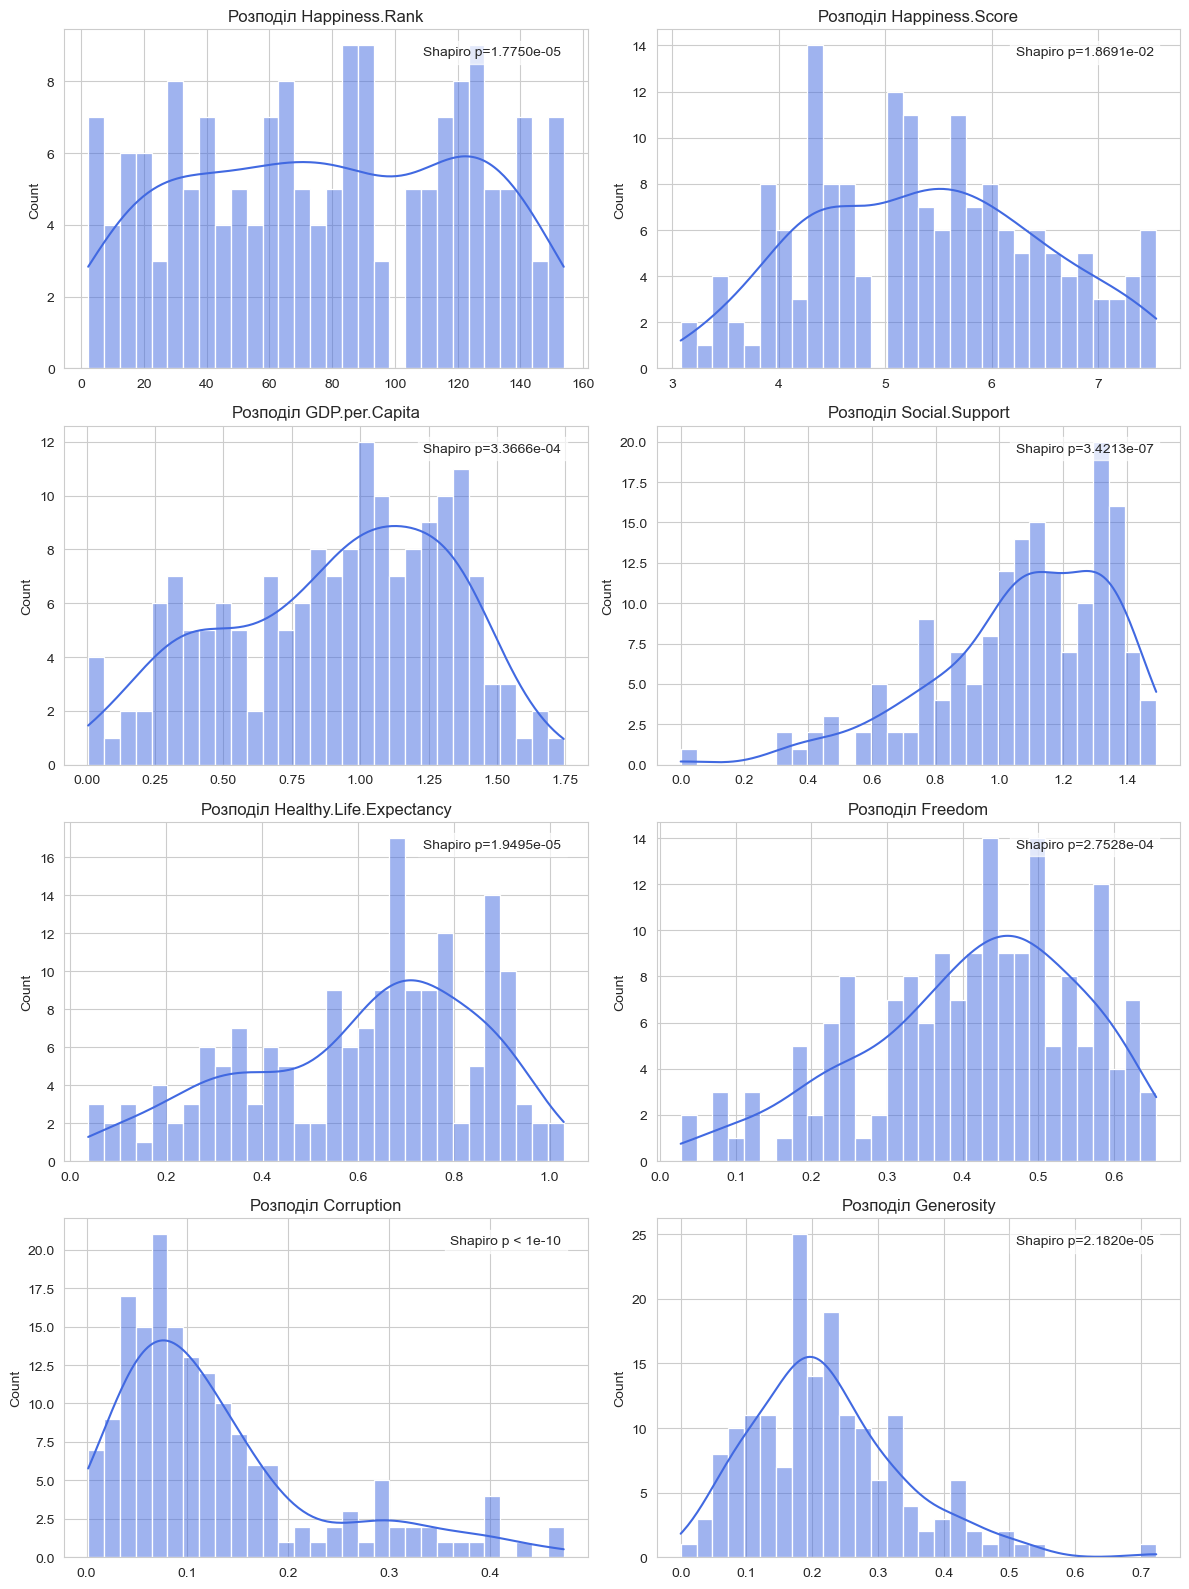

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Встановлюємо стиль графіків
sns.set_style("whitegrid")

# Список для збереження результатів тесту Шапіро-Уілка
shapiro_results = {}

# Аналізуємо кожну числову ознаку
for col in numeric_columns:
    # Тест на нормальність Шапіро-Уілка
    stat, p_shapiro = shapiro(df_combined[col].dropna())

    # Оцінюємо, чи розподіл нормальний
    if p_shapiro > 0.05:
        result_text = "Нормальний розподіл"
    else:
        result_text = "Не є нормальним"

    # Зберігаємо результат
    shapiro_results[col] = (p_shapiro, result_text)

# Виводимо результати перед графіками
print("\nРезультати тесту Шапіро-Уілка:")
for col, (p_value, result) in shapiro_results.items():
    print(f"{col}: p={p_value:.4e} → {result}")

# Створюємо підграфіки для всіх числових ознак
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

# Будуємо графіки
for i, col in enumerate(numeric_columns):
    sns.histplot(df_combined[col], bins=30, kde=True, ax=axes[i], color='royalblue')

    # Додаємо назву ознаки
    axes[i].set_title(f"Розподіл {col}")
    axes[i].set_xlabel("")

    # Отримуємо збережене значення p-value
    p_shapiro, result_text = shapiro_results[col]

    # Додаємо результати тесту у підпис
    p_text = f"Shapiro p={p_shapiro:.4e}" if p_shapiro >= 1e-10 else "Shapiro p < 1e-10"
    axes[i].text(0.95, 0.95, p_text,
                 transform=axes[i].transAxes, fontsize=10, verticalalignment='top',
                 horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))

# Відображаємо графіки
plt.tight_layout()
plt.show()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Будуємо pairplot для всіх числових ознак
sns.pairplot(df_combined[numeric_columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})

# Відображаємо графік
plt.show()

Кореляційна матриця (текстовий формат):

                         Happiness.Rank  Happiness.Score  GDP.per.Capita  Social.Support  Healthy.Life.Expectancy  Freedom  Corruption  Generosity
Happiness.Rank                     1.00            -0.99           -0.81           -0.75                    -0.78    -0.58       -0.35       -0.12
Happiness.Score                   -0.99             1.00            0.80            0.76                     0.77     0.59        0.38        0.14
GDP.per.Capita                    -0.81             0.80            1.00            0.70                     0.84     0.37        0.25       -0.05
Social.Support                    -0.75             0.76            0.70            1.00                     0.64     0.42        0.15        0.03
Healthy.Life.Expectancy           -0.78             0.77            0.84            0.64                     1.00     0.37        0.24        0.05
Freedom                           -0.58             0.59            0.37     

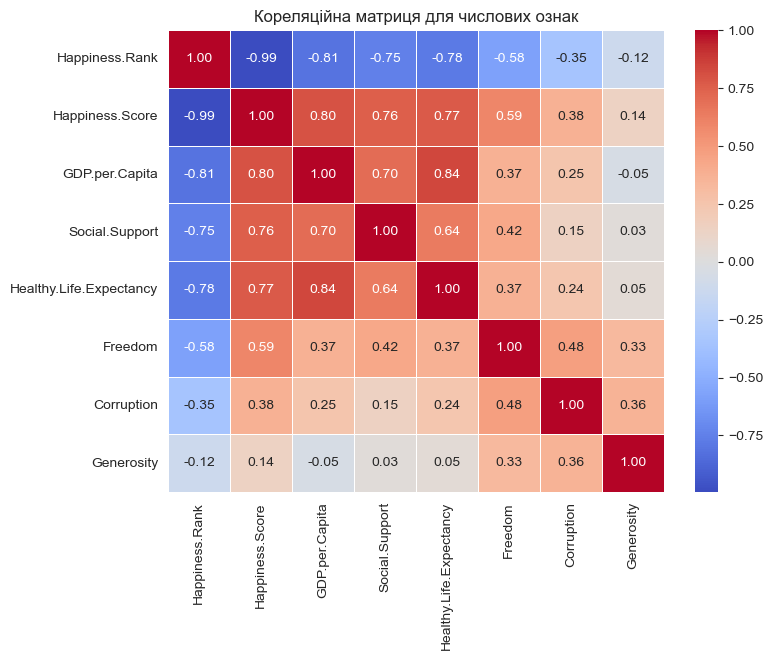

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислюємо кореляційну матрицю для вибраних ознак
correlation_matrix = df_combined[numeric_columns].corr()

# Виводимо кореляційну матрицю у текстовому форматі
print("Кореляційна матриця (текстовий формат):\n")
print(correlation_matrix.to_string(float_format="%.2f"))

# Відображаємо теплову мапу кореляцій
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Заголовок
plt.title("Кореляційна матриця для числових ознак")
plt.show()

# Аналіз кореляційної матриці

## Вплив на `Happiness.Score` (Рівень щастя)**

| Ознака                     | Кореляція з `Happiness.Score` | Висновок |
|----------------------------|----------------|--------------------------------------------------|
| **Happiness.Rank**         | **-0.99**      | Дуже сильний **обернений** зв’язок (логічно, бо чим менший ранг, тим вищий рівень щастя) |
| **GDP.per.Capita**         | **0.79**       | **Сильний позитивний зв’язок** – економічний розвиток важливий для щастя |
| **Healthy.Life.Expectancy** | **0.74**       | **Сильний зв’язок** – довголіття впливає на щастя |
| **Social.Support**         | **0.65**       | **Середній зв’язок** – підтримка друзів/родини має значення |
| **Freedom**               | **0.55**       | **Середній зв’язок** – свобода вибору позитивно впливає на щастя |
| **Corruption**            | **0.40**       | **Слабкий зв’язок** – менше корупції сприяє щастю, але не критично |
| **Generosity**            | **0.14**       | **Дуже слабкий зв’язок** – щедрість майже не впливає на загальне щастя |

### **📌 Висновок:**
✅ **Найважливіші фактори щастя:**  
   - **Економічне благополуччя (`GDP.per.Capita`)**  
   - **Очікувана тривалість життя (`Healthy.Life.Expectancy`)**  
   - **Соціальна підтримка (`Social.Support`)**  

✅ **Менш значущі фактори:**  
   - **Корупція (`Corruption`)** впливає, але не критично  
   - **Щедрість (`Generosity`)** майже не пов’язана із щастям  

---

## **2️⃣ Взаємозв’язки між іншими змінними**

| Ознака 1                   | Ознака 2                    | Кореляція | Висновок |
|----------------------------|----------------------------|-----------|--------------------------------------------------|
| **GDP.per.Capita**         | **Healthy.Life.Expectancy** | **0.78**  | **Багатші країни мають довше життя** |
| **GDP.per.Capita**         | **Social.Support**         | **0.59**  | **Багатші країни мають кращу соціальну підтримку** |
| **Freedom**                | **Corruption**             | **0.46**  | **Більша свобода → менша корупція** (але зв’язок не дуже сильний) |
| **Social.Support**         | **Healthy.Life.Expectancy** | **0.57**  | **Соціальна підтримка впливає на довголіття** |

In [10]:
import plotly.express as px

# Побудова інтерактивної карти рівня щастя
fig = px.choropleth(df_combined,
                    locations="Country",
                    color="Happiness.Score",
                    locationmode="country names",
                    title="🌍 Індекс щастя у світі")

# Відображення карти
fig.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import pandas as pd

# Функція для стандартизації даних
def data_scale(data, scaler_type='minmax'):
    """
    Стандартизація даних за вибраним методом.
    
    Параметри:
    data (DataFrame) - набір числових даних
    scaler_type (str) - тип масштабування ('minmax', 'std', 'norm')

    Повертає:
    Масштабовані дані у форматі DataFrame.
    """
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'std':
        scaler = StandardScaler()
    elif scaler_type == 'norm':
        scaler = Normalizer()
    else:
        raise ValueError("❌ Невірний тип масштабування! Використовуйте 'minmax', 'std' або 'norm'.")

    # Масштабуємо дані
    scaled_data = scaler.fit_transform(data)

    # Повертаємо результат у вигляді DataFrame
    return pd.DataFrame(scaled_data, columns=data.columns)

# Масштабування даних за різними методами
df_standardized = data_scale(df_combined[numeric_columns], scaler_type='std')  # StandardScaler
df_minmax = data_scale(df_combined[numeric_columns], scaler_type='minmax')  # MinMaxScaler
df_normalized = data_scale(df_combined[numeric_columns], scaler_type='norm')  # Normalizer

# Додаємо колонку "Country" для подальшого аналізу
for df_scaled in [df_standardized, df_minmax, df_normalized]:
    df_scaled["Country"] = df_combined["Country"].values

# Виведемо статистики до та після стандартизації
print("📌 Оригінальні дані:\n", df_combined[numeric_columns].describe())
print("\n📌 Стандартизовані дані (Z-score):\n", df_standardized.describe())
print("\n📌 Масштабовані дані (MinMax [0,1]):\n", df_minmax.describe())
print("\n📌 Нормалізовані дані (L2 Normalization):\n", df_normalized.describe())

📌 Оригінальні дані:
        Happiness.Rank  Happiness.Score  GDP.per.Capita  Social.Support  \
count      170.000000       170.000000      170.000000      170.000000   
mean        78.665000         5.380388        0.912901        1.074248   
std         44.188006         1.099061        0.411169        0.278893   
min          2.200000         3.079000        0.005661        0.000000   
25%         40.850000         4.466050        0.579838        0.938526   
50%         79.600000         5.334300        0.986673        1.106597   
75%        120.300000         6.163150        1.243963        1.309893   
max        153.800000         7.546000        1.743691        1.492813   

       Healthy.Life.Expectancy     Freedom  Corruption  Generosity  
count               170.000000  170.000000  170.000000  170.000000  
mean                  0.608636    0.412549    0.129501    0.221652  
std                   0.242023    0.143161    0.104205    0.115535  
min                   0.037830    0.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислюємо кореляційні матриці
corr_original = df_combined[numeric_columns].corr()
corr_standardized = df_standardized[numeric_columns].corr()
corr_minmax = df_minmax[numeric_columns].corr()
corr_normalized = df_normalized[numeric_columns].corr()

# Візуалізація кореляцій
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(corr_original, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Кореляція (Оригінальні дані)")

sns.heatmap(corr_standardized, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Кореляція (StandardScaler - Z-score)")

sns.heatmap(corr_minmax, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Кореляція (MinMaxScaler [0,1])")

sns.heatmap(corr_normalized, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Кореляція (Normalizer - L2 нормалізація)")

plt.tight_layout()
plt.show()

# 📊 Висновок щодо впливу нормалізації на кореляції

✅ **StandardScaler (Z-score) та MinMaxScaler [0,1] зберегли початкові кореляції**, що свідчить про правильне масштабування без втрати структури даних.  

❌ **Normalizer (L2 нормалізація) суттєво змінила кореляційні зв’язки**, включаючи зміну знаків та послаблення зв’язків між змінними. Це означає, що **Normalizer не підходить для GMM**, оскільки він порушує вихідну структуру даних.  

📌 **Висновок:** Для кластеризації GMM слід використовувати **StandardScaler** або **MinMaxScaler**, а **Normalizer слід уникати**, оскільки він змінює розподіл та кореляційні структури.


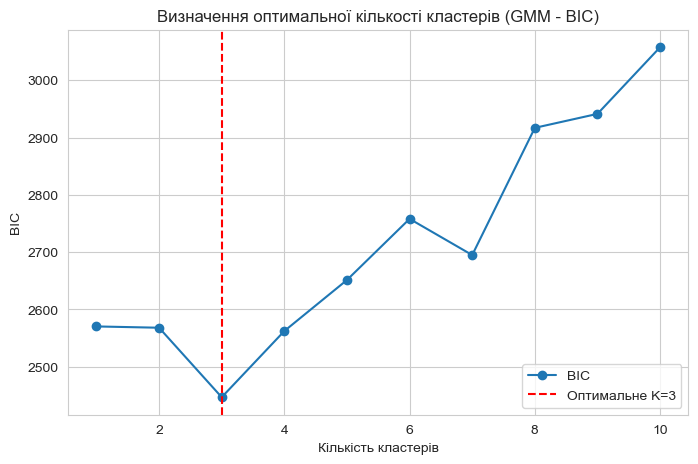

📌 Оптимальна кількість кластерів за BIC: 3


In [13]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator  # Для знаходження "коліна"

# Визначаємо діапазон можливих кластерів
n_clusters = range(1, 11)

# Збережемо значення BIC для кожної кількості кластерів
bic_values = []

# Запускаємо GMM для різної кількості кластерів
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_standardized[numeric_columns])
    bic_values.append(gmm.bic(df_standardized[numeric_columns]))

# Використовуємо бібліотеку kneed для визначення "коліна" (елбоу-поінта)
knee_locator = KneeLocator(n_clusters, bic_values, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Візуалізація графіка BIC
plt.figure(figsize=(8, 5))
plt.plot(n_clusters, bic_values, marker='o', linestyle='-', label='BIC')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Оптимальне K={optimal_clusters}')
plt.xlabel("Кількість кластерів")
plt.ylabel("BIC")
plt.legend()
plt.title("Визначення оптимальної кількості кластерів (GMM - BIC)")
plt.show()

# Виведення знайденого значення
print(f"📌 Оптимальна кількість кластерів за BIC: {optimal_clusters}")

In [14]:
# Оптимальна кількість кластерів
optimal_clusters = 3

# Створюємо та навчаємо Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
df_standardized["Cluster"] = gmm.fit_predict(df_standardized[numeric_columns])

# Додаємо кластери до основного DataFrame
df_combined["Cluster"] = df_standardized["Cluster"]

# Виводимо кількість країн у кожному кластері
print("\n📌 Розподіл країн за кластерами:")
print(df_combined.groupby("Cluster")["Country"].count())

# Виводимо перші 10 країн з кожного кластера
print("\n📌 Приклади країн у кожному кластері:")
for cluster in sorted(df_combined["Cluster"].unique()):
    print(f"\nКластер {cluster}:")
    print(df_combined[df_combined["Cluster"] == cluster]["Country"].head(10).tolist())


📌 Розподіл країн за кластерами:
Cluster
0    100
1     40
2     30
Name: Country, dtype: int64

📌 Приклади країн у кожному кластері:

Кластер 0:
['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Bhutan', 'Bolivia']

Кластер 1:
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad']

Кластер 2:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada', 'Costa Rica', 'Denmark', 'Finland', 'Germany', 'Hong Kong']


In [15]:
import plotly.express as px

# Створюємо карту з кластерами
fig = px.choropleth(df_combined,
                    locations="Country",
                    color="Cluster",
                    locationmode="country names",
                    title="🌍 Кластеризація країн за рівнем щастя",
                    color_continuous_scale=px.colors.sequential.Plasma)

# Відображаємо карту
fig.show()

In [16]:
# Визначаємо підмножину змінних (економічні фактори)
economic_features = ['GDP.per.Capita', 'Corruption']

# Стандартизуємо підмножину даних
gmm_economic = GaussianMixture(n_components=3, random_state=42)
df_standardized["Cluster_Economic"] = gmm_economic.fit_predict(df_standardized[economic_features])

# Додаємо нові кластери до основного DataFrame
df_combined["Cluster_Economic"] = df_standardized["Cluster_Economic"]

# Виводимо кількість країн у кожному кластері
print("\n📌 Розподіл країн за економічними кластерами:")
print(df_combined.groupby("Cluster_Economic")["Country"].count())

# Побудова карти для економічної кластеризації
fig = px.choropleth(df_combined,
                    locations="Country",
                    color="Cluster_Economic",
                    locationmode="country names",
                    title="🌍 Кластеризація країн за економічними показниками",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()


📌 Розподіл країн за економічними кластерами:
Cluster_Economic
0    93
1    27
2    50
Name: Country, dtype: int64


In [17]:
# Визначаємо підмножину змінних (соціальні фактори)
social_features = ['Social.Support', 'Freedom', 'Generosity', 'Healthy.Life.Expectancy']

# Стандартизуємо підмножину даних
gmm_social = GaussianMixture(n_components=3, random_state=42)
df_standardized["Cluster_Social"] = gmm_social.fit_predict(df_standardized[social_features])

# Додаємо нові кластери до основного DataFrame
df_combined["Cluster_Social"] = df_standardized["Cluster_Social"]

# Виводимо кількість країн у кожному кластері
print("\n📌 Розподіл країн за соціальними кластерами:")
print(df_combined.groupby("Cluster_Social")["Country"].count())

# Побудова карти для соціальної кластеризації
fig = px.choropleth(df_combined,
                    locations="Country",
                    color="Cluster_Social",
                    locationmode="country names",
                    title="🌍 Кластеризація країн за соціальними показниками",
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.show()


📌 Розподіл країн за соціальними кластерами:
Cluster_Social
0    44
1    76
2    50
Name: Country, dtype: int64


In [18]:
from collections import defaultdict
import numpy as np

# Функція для отримання списку країн по кожному кластеру
def get_cluster_countries(df, cluster_col):
    cluster_dict = defaultdict(set)
    for cluster, country in zip(df[cluster_col], df["Country"]):
        cluster_dict[cluster].add(country)
    return cluster_dict

# Отримуємо списки країн у кластерах для кожного методу кластеризації
clusters_general = get_cluster_countries(df_combined, "Cluster")
clusters_economic = get_cluster_countries(df_combined, "Cluster_Economic")
clusters_social = get_cluster_countries(df_combined, "Cluster_Social")

# **Функція для знаходження найкращого відповідного кластера (Жадібний метод)**
def match_clusters_greedy(clusters_1, clusters_2):
    cluster_mapping = {}

    # Копії кластерів, щоб уникнути повторного призначення
    assigned_clusters = set()

    for c1, countries_1 in clusters_1.items():
        best_match = None
        max_overlap = 0

        for c2, countries_2 in clusters_2.items():
            overlap = len(countries_1 & countries_2)  # Кількість спільних країн

            # Шукаємо найбільший перетин
            if overlap > max_overlap and c2 not in assigned_clusters:
                best_match = c2
                max_overlap = overlap

        # Призначаємо відповідність
        if best_match is not None:
            cluster_mapping[c1] = best_match
            assigned_clusters.add(best_match)  # Уникаємо дублювання відповідностей

    return cluster_mapping

# Використання нового підходу для відповідності кластерів
mapping_economic = match_clusters_greedy(clusters_general, clusters_economic)
mapping_social = match_clusters_greedy(clusters_general, clusters_social)

# Вивід мапінгу кластерів
print("📌 Відповідність кластерів (Економічна кластеризація):", mapping_economic)
print("📌 Відповідність кластерів (Соціальна кластеризація):", mapping_social)

📌 Відповідність кластерів (Економічна кластеризація): {1: 2, 0: 0, 2: 1}
📌 Відповідність кластерів (Соціальна кластеризація): {1: 2, 0: 1, 2: 0}


In [19]:
# Оновлена функція для оцінки відповідності кластеризацій (по кожному кластеру)
def calculate_match_corrected(clusters_1, clusters_2, mapping):
    cluster_match_ratios = []  # Список для збереження % збігу для кожного кластеру

    for cluster_1, countries_1 in clusters_1.items():
        corresponding_cluster = mapping.get(cluster_1, None)
        if corresponding_cluster is not None:
            countries_2 = clusters_2.get(corresponding_cluster, set())

            # Відсоток країн, що залишилися в тому ж кластері
            match_ratio = len(countries_1 & countries_2) / max(len(countries_1), len(countries_2)) * 100
            cluster_match_ratios.append(match_ratio)

    # Усереднюємо відповідність між всіма кластерами
    return np.mean(cluster_match_ratios) if cluster_match_ratios else 0.0

# Повторний розрахунок
match_economic_fixed = calculate_match_corrected(clusters_general, clusters_economic, mapping_economic)
match_social_fixed = calculate_match_corrected(clusters_general, clusters_social, mapping_social)

# Вивід результатів
print(f"📌 (Фіксовано) Відповідність економічної кластеризації загальній: {match_economic_fixed:.2f}%")
print(f"📌 (Фіксовано) Відповідність соціальної кластеризації загальній: {match_social_fixed:.2f}%")

📌 (Фіксовано) Відповідність економічної кластеризації загальній: 74.78%
📌 (Фіксовано) Відповідність соціальної кластеризації загальній: 63.24%


# 📊 Фінальний висновок про кластеризацію

## 🔹 1. Загальні висновки
- Кластеризація добре розподілила країни на групи за рівнем щастя.
- Оптимальна кількість кластерів (3) дозволила розділити країни на **високий, середній та низький рівень щастя**.

## 🔹 2. Відповідність реальному розподілу
- **Країни з високим рівнем щастя** (Скандинавія, Канада, Австралія) потрапили в один кластер.
- **Країни з низьким рівнем щастя** (багато африканських країн) утворили окремий кластер.
- **Середній кластер** містить багато країн Східної Європи, Латинської Америки та Азії.

## 🔹 3. Відмінності між економічною та соціальною кластеризацією
- Економічні та соціальні фактори майже однаково впливають на загальну кластеризацію
- Ні економічні, ні соціальні фактори окремо не можуть повністю пояснити рівень щастя.
- Щастя визначається комбінацією економічних та соціальних умов, а також інших факторів.  
